### The 7 steps of machine learning
https://www.youtube.com/watch?v=nKW8Ndu7Mjw

watch the video above and try to impliment for some data for my own

**Step 1: Gathering Data**

In [7]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

**Step 2: Data Preparation**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

sns.set()

In [ ]:
X = pd.DataFrame(housing['data'], columns = housing['feature_names'])
y = pd.DataFrame(housing['target'], columns = housing['target_names'])

In [ ]:
X.describe()

In [ ]:
sns.pairplot(pd.concat([X, y], axis = 1), plot_kws = {'alpha': 0.1})
plt.show()

In [ ]:
sns.heatmap(pd.concat([X, y], axis = 1).corr(), annot = True)

In [ ]:
sns.histplot(y)

In [ ]:
df = pd.concat([X, y], axis = 1)
df = df[df['MedHouseVal'] < 5]
y = df['MedHouseVal']
X = df.drop(columns = ['MedHouseVal', 'Latitude', 'Longitude'])
X_train, X_test, y_train, y_test = train_test_split(X, y)

**Step 3: Choosing a Model**

In [32]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

0.4721036791759687


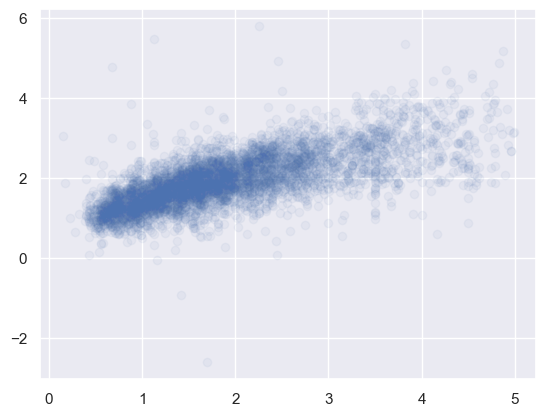

In [28]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

pipe.fit(X_train, y_train)
print(mean_squared_error(y_test, pipe.predict(X_test)))
plt.scatter(y_test, pipe.predict(X_test), alpha = 0.05)

0.34352239306689447


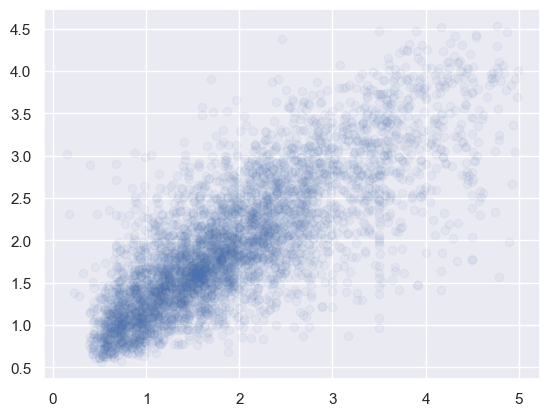

In [29]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor())
])

pipe.fit(X_train, y_train)
print(mean_squared_error(y_test, pipe.predict(X_test)))
plt.scatter(y_test, pipe.predict(X_test), alpha = 0.05)

0.4748627885695932


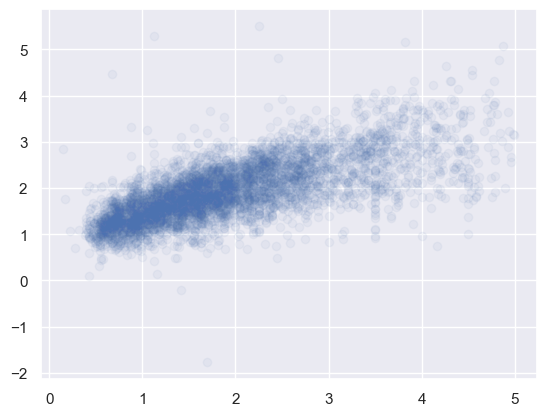

In [30]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Lasso(alpha = 0.01))
])

pipe.fit(X_train, y_train)
print(mean_squared_error(y_test, pipe.predict(X_test)))
plt.scatter(y_test, pipe.predict(X_test), alpha = 0.05)

In [31]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Lasso())
])

cv = KFold(n_splits = 5)

param_grid = {
    'regressor__alpha': np.linspace(0.01, 0.1, 100)
}

grid = GridSearchCV(pipe, param_grid, cv = cv, scoring = 'neg_mean_squared_error')
grid.fit(X_train, y_train)

print(grid.best_params_)

{'regressor__alpha': 0.01}


In [ ]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Lasso(alpha = 0.05))
])

pipe.fit(X_train, y_train)
print(mean_squared_error(y_test, pipe.predict(X_test)))
plt.scatter(y_test, pipe.predict(X_test), alpha = 0.05)

In [10]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures()),
    ('regressor', LinearRegression())
])

cv = KFold(n_splits = 5)

param_grid = {
    'poly__degree': [i for i in range(1, 5)]
}

grid = GridSearchCV(pipe, param_grid, cv = cv, scoring = 'neg_mean_squared_error', verbose = 5, n_jobs = -1)
grid.fit(X_train, y_train)

print(grid.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ...................poly__degree=1;, score=-0.481 total time=   0.0s
[CV 2/5] END ...................poly__degree=1;, score=-0.466 total time=   0.0s
[CV 3/5] END ...................poly__degree=1;, score=-0.477 total time=   0.0s
[CV 4/5] END ...................poly__degree=1;, score=-0.474 total time=   0.0s
[CV 5/5] END ...................poly__degree=1;, score=-0.477 total time=   0.0s
[CV 1/5] END ...................poly__degree=2;, score=-0.430 total time=   0.0s
[CV 3/5] END ..................poly__degree=2;, score=-15.196 total time=   0.1s
[CV 4/5] END ...................poly__degree=2;, score=-3.455 total time=   0.1s
[CV 5/5] END ...................poly__degree=2;, score=-0.417 total time=   0.0s
[CV 2/5] END ...................poly__degree=2;, score=-0.908 total time=   0.1s
[CV 4/5] END ...............poly__degree=3;, score=-18010.824 total time=   0.2s
[CV 1/5] END ...................poly__degree=3;, 

In [24]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures()),
    ('regressor', Lasso())
])

cv = KFold(n_splits = 5)

param_grid = {
    'poly__degree': [i for i in range(1, 3)], 
    'regressor__alpha': np.linspace(0.01, 0.1, 10)
}

grid = GridSearchCV(pipe, param_grid, cv = cv, scoring = 'neg_mean_squared_error', verbose = 1, n_jobs = -1)
grid.fit(X_train, y_train)

print(grid.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/Users/yoichiojima/Desktop/personal/scikit-learn-training/.venv/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.246e+01, tolerance: 1.122e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/Users/yoichiojima/Desktop/personal/scikit-learn-training/.venv/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.195e+01, tolerance: 1.119e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/Users/yoichiojima/Desktop/personal/scikit-learn-training/.venv/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: Converg

{'poly__degree': 1, 'regressor__alpha': 0.01}


In [26]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures()),
    ('regressor',RandomForestRegressor())
])

cv = KFold(n_splits = 5)

param_grid = {
    'poly__degree': [i for i in range(1, 3)], 
    'regressor__n_estimators': [i for i in range(10, 100, 10)]
}

grid = GridSearchCV(pipe, param_grid, cv = cv, scoring = 'neg_mean_squared_error', verbose = 2, n_jobs = -1)
grid.fit(X_train, y_train)

print(grid.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END .........poly__degree=1, regressor__n_estimators=10; total time=   0.7s
[CV] END .........poly__degree=1, regressor__n_estimators=10; total time=   0.7s
[CV] END .........poly__degree=1, regressor__n_estimators=10; total time=   0.8s
[CV] END .........poly__degree=1, regressor__n_estimators=10; total time=   0.7s
[CV] END .........poly__degree=1, regressor__n_estimators=10; total time=   0.8s
[CV] END .........poly__degree=1, regressor__n_estimators=20; total time=   1.4s
[CV] END .........poly__degree=1, regressor__n_estimators=20; total time=   1.5s
[CV] END .........poly__degree=1, regressor__n_estimators=20; total time=   1.4s
[CV] END .........poly__degree=1, regressor__n_estimators=20; total time=   1.5s
[CV] END .........poly__degree=1, regressor__n_estimators=20; total time=   1.5s
[CV] END .........poly__degree=1, regressor__n_estimators=30; total time=   2.3s
[CV] END .........poly__degree=1, regressor__n_e

0.3429166506343481


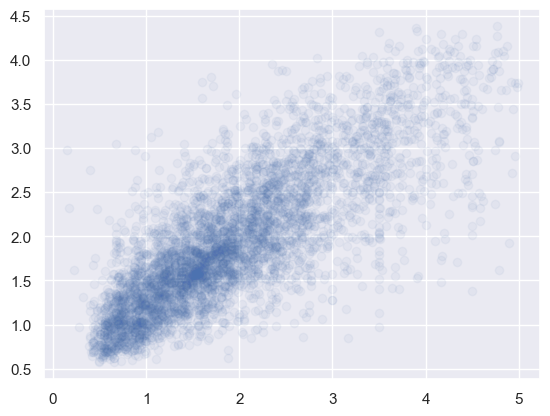

In [27]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree = 2)),
    ('regressor',RandomForestRegressor(n_estimators = 90))
])

pipe.fit(X_train, y_train)
print(mean_squared_error(y_test, pipe.predict(X_test)))
plt.scatter(y_test, pipe.predict(X_test), alpha = 0.05)

In [33]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', KNeighborsRegressor())
])

cv = KFold(n_splits = 5)

param_grid = {
    'regressor__n_neighbors': [i for i in range(1, 10)]
}

grid = GridSearchCV(pipe, param_grid, cv = cv, scoring = 'neg_mean_squared_error')
grid.fit(X_train, y_train)

print(grid.best_params_)

{'regressor__n_neighbors': 9}


0.4173149801965172


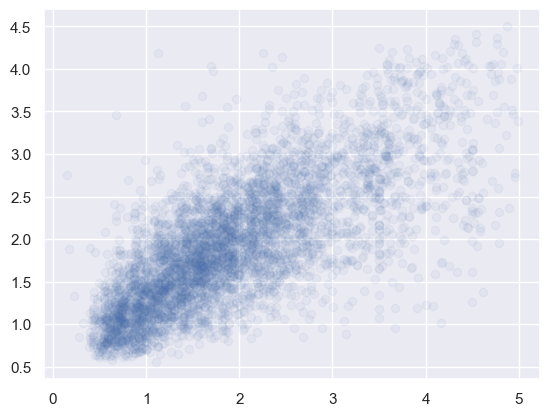

In [34]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', KNeighborsRegressor(n_neighbors = 9))
])

pipe.fit(X_train, y_train)
print(mean_squared_error(y_test, pipe.predict(X_test)))
plt.scatter(y_test, pipe.predict(X_test), alpha = 0.05)

**Step 4: Training**

In [36]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor())
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', RandomForestRegressor())])

**Step 5: Evaluation**

0.3437510539828159


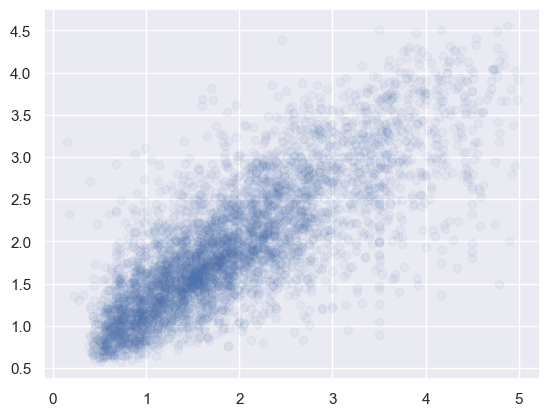

In [37]:
pred = pipe.predict(X_test)
print(mean_squared_error(y_test, pred))
plt.scatter(y_test, pred, alpha = 0.05)

**Step 6: Parameter Tuning**

In [46]:
cv = KFold(n_splits = 5)

param_grid = {
    'regressor__n_estimators': [i for i in range(1, 200, 10)]
}

grid = GridSearchCV(pipe, param_grid, cv = cv, scoring = 'neg_mean_squared_error', verbose = 10, n_jobs = -1)
grid.fit(X_train, y_train)

print(grid.best_params_)

Fitting 5 folds for each of 19 candidates, totalling 95 fits
[CV 4/5; 1/19] START regressor__n_estimators=10.................................
[CV 1/5; 1/19] START regressor__n_estimators=10.................................
[CV 3/5; 1/19] START regressor__n_estimators=10.................................
[CV 2/5; 1/19] START regressor__n_estimators=10.................................
[CV 5/5; 1/19] START regressor__n_estimators=10.................................
[CV 1/5; 2/19] START regressor__n_estimators=20.................................
[CV 2/5; 2/19] START regressor__n_estimators=20.................................
[CV 3/5; 2/19] START regressor__n_estimators=20.................................
[CV 1/5; 1/19] END .regressor__n_estimators=10;, score=-0.386 total time=   0.8s
[CV 4/5; 1/19] END .regressor__n_estimators=10;, score=-0.374 total time=   0.8s
[CV 3/5; 1/19] END .regressor__n_estimators=10;, score=-0.425 total time=   0.7s
[CV 5/5; 1/19] END .regressor__n_estimators=10;,

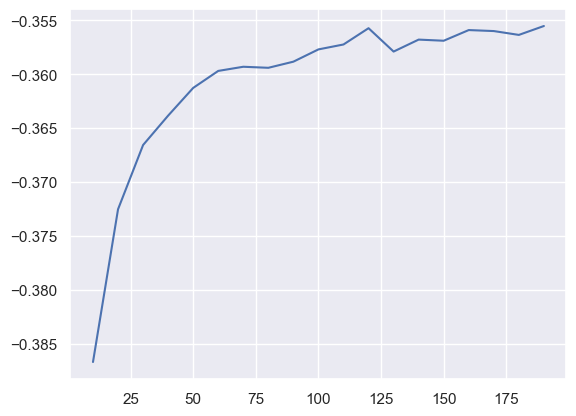

In [58]:
cv_result = pd.DataFrame(grid.cv_results_)
cv_result['n_estimators'] = cv_result['params'].apply(lambda x: x['regressor__n_estimators'])
plt.plot(cv_result['n_estimators'], cv_result['mean_test_score'])

In [59]:
cv = KFold(n_splits = 5)

param_grid = {
    'regressor__n_estimators': [i for i in range(50, 70, 2)]
}

grid = GridSearchCV(pipe, param_grid, cv = cv, scoring = 'neg_mean_squared_error', verbose = 10, n_jobs = -1)
grid.fit(X_train, y_train)

print(grid.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START regressor__n_estimators=50.................................
[CV 2/5; 1/10] START regressor__n_estimators=50.................................
[CV 3/5; 1/10] START regressor__n_estimators=50.................................
[CV 4/5; 1/10] START regressor__n_estimators=50.................................
[CV 5/5; 1/10] START regressor__n_estimators=50.................................
[CV 1/5; 2/10] START regressor__n_estimators=52.................................
[CV 2/5; 2/10] START regressor__n_estimators=52.................................
[CV 3/5; 2/10] START regressor__n_estimators=52.................................
[CV 1/5; 1/10] END .regressor__n_estimators=50;, score=-0.358 total time=   3.4s
[CV 2/5; 1/10] END .regressor__n_estimators=50;, score=-0.365 total time=   3.4s
[CV 4/5; 2/10] START regressor__n_estimators=52.................................
[CV 5/5; 2/10] START regressor__n_estimators=52.

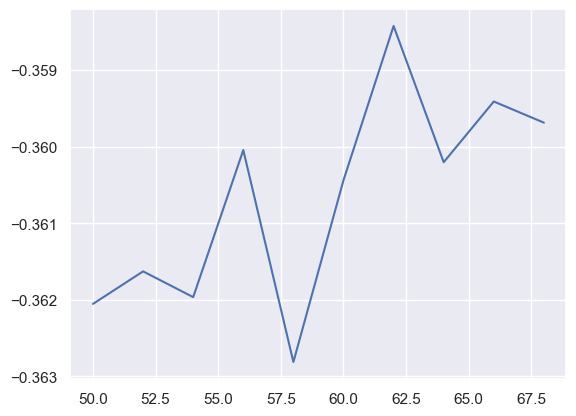

In [60]:
cv_result = pd.DataFrame(grid.cv_results_)
cv_result['n_estimators'] = cv_result['params'].apply(lambda x: x['regressor__n_estimators'])
plt.plot(cv_result['n_estimators'], cv_result['mean_test_score'])

**Step 7: Prediction**

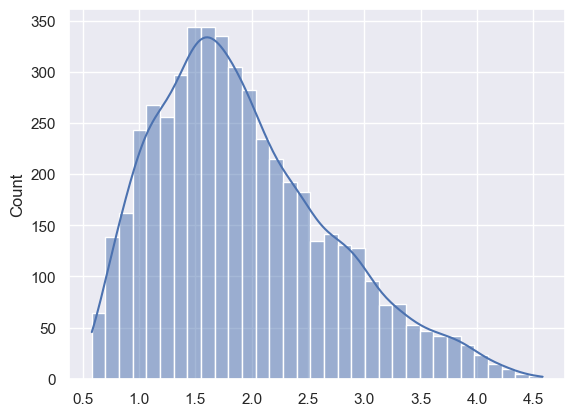

In [64]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(n_estimators = 60))
])

pipe.fit(X_train, y_train)

pred = pipe.predict(X_test)
sns.histplot(pred, kde = True)
plt.show()